# Course 1: Task 1 and Task 2, Susana Reyes

# Task 1: Investigating Customer Buying Patterns

## Importing and Pre-Processing

In [1]:
#Import Modules

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

#SKLearn, need to specify where the function "lives" before importing it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

#Helpers

%matplotlib inline

In [2]:
#Import Data Set using Pandas (default data structure in Pandas is called Dataframe)
data = pd.read_csv('Demographic_Data.csv')

In [3]:
#View a quick sample by checking the first 5 rows of the data frame
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
#You can view more records by adding number inside parenthesis
data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


In [5]:
#Get Column Names
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [6]:
#Understand the makeup of the data, understand which values are numeric or nominal
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
#Check the data types of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


Data Cleaning

In [8]:
#Check for Duplicate Rows
data = data.drop_duplicates()

In [9]:
#Check to see if anything was dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [10]:
#Understand the makeup of the data after duplicates dropped
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [11]:
#Check for Missing Values, print the sum
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [12]:
#Check all Datatypes are numeric
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [13]:
#Check in-store column only contains two unique values
data['in-store'].nunique()

2

In [14]:
#Check region column only contains four unique values
data['region'].nunique()

4

# Exploratory Data Analysis (EDA)

## Visualizing the Data

In [15]:
#Import the matplotlib library (contains most of the major visualizations we'll be using)
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Make sure we know the column names in dataframe
header =data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


Build Histogram for each Variable

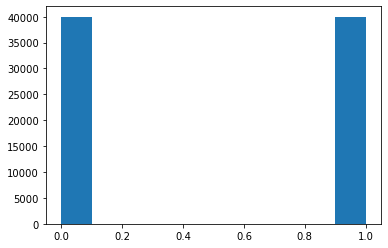

In [17]:
plt.hist(data['in-store'])
plt.show()

(array([39989.,     0.,     0., 39990.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

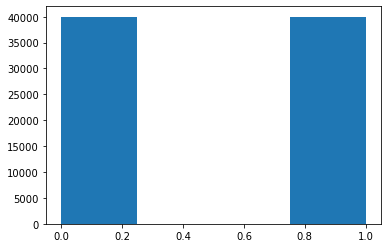

In [18]:
plt.hist(data['in-store'], bins=4)

(array([22446., 29715., 19846.,  7972.]),
 array([18.  , 34.75, 51.5 , 68.25, 85.  ]),
 <BarContainer object of 4 artists>)

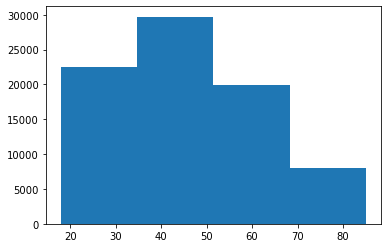

In [19]:
plt.hist(data['age'], bins=4)

(array([16983., 23080., 22752., 17164.]),
 array([1.  , 2.75, 4.5 , 6.25, 8.  ]),
 <BarContainer object of 4 artists>)

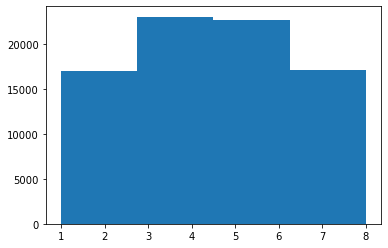

In [20]:
plt.hist(data['items'], bins=4)

(array([46593., 18038., 10315.,  5033.]),
 array([   5.0047  ,  753.753525, 1502.50235 , 2251.251175, 3000.      ]),
 <BarContainer object of 4 artists>)

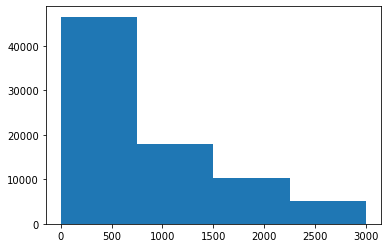

In [21]:
plt.hist(data['amount'], bins=4)

(array([15997., 19994., 18000., 25988.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

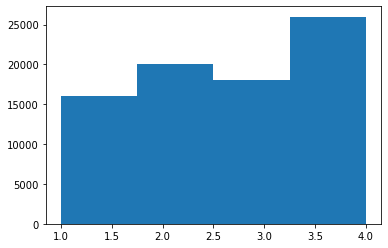

In [22]:
plt.hist(data['region'], bins=4)

Line Plot Example

In [23]:
import numpy as np

In [24]:
#Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

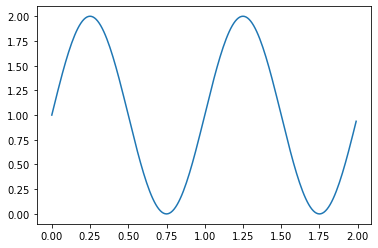

In [25]:
fig, ax = plt.subplots ()
ax.plot(t,s)
plt.show()

Scatter Plots

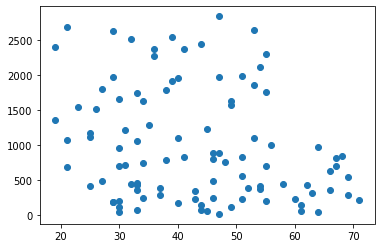

In [26]:
#Age and Amount, Sample 100
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

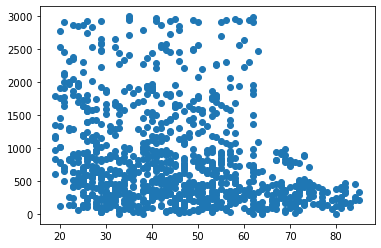

In [27]:
#Age and Amount, Sample 1000
data_sample = data.sample(1000)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='age', ylabel='amount'>

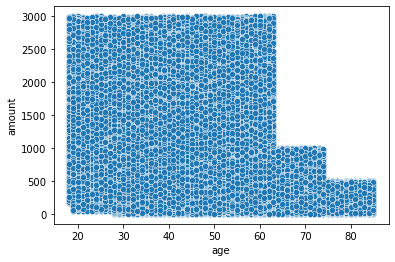

In [28]:
#Age and Amount, Sample All Data
sns.scatterplot(data=data, x="age", y="amount")

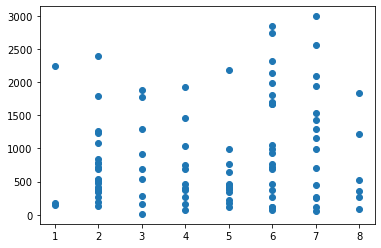

In [29]:
#Items and Amount, Sample 100
data_sample = data.sample(100)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

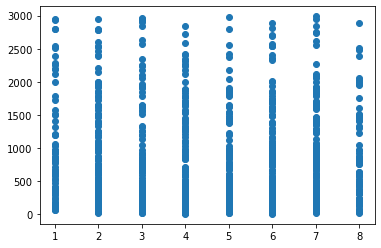

In [30]:
#Items and Amount, Sample 1000
data_sample = data.sample(1000)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='items', ylabel='amount'>

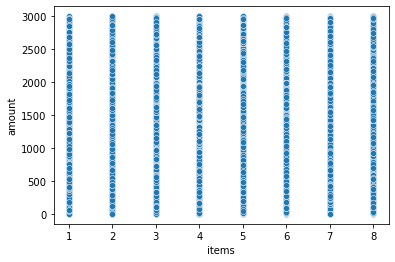

In [31]:
#Items and Amount, All Data
sns.scatterplot(data=data, x="items", y="amount")

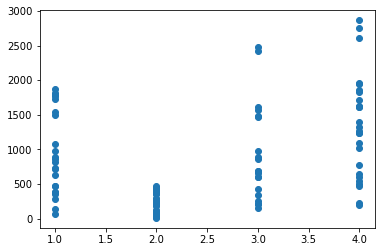

In [32]:
#Region and Amount, Sample 100
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

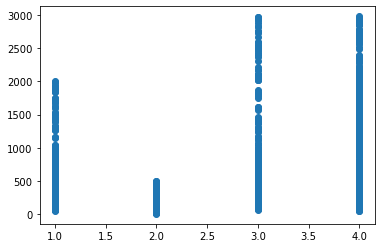

In [33]:
#Region and Amount, Sample 1000
data_sample = data.sample(1000)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='region', ylabel='amount'>

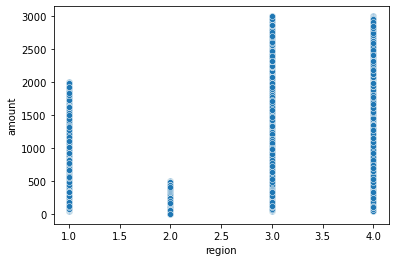

In [34]:
#Region and Amount, All Data
sns.scatterplot(data=data, x="region", y="amount")

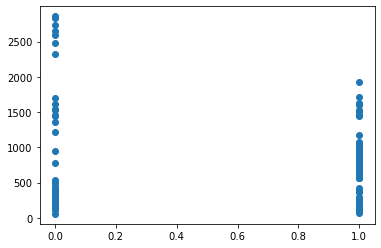

In [35]:
#In-Store and Amount, Sample 100
data_sample = data.sample(100)
x = data_sample['in-store']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='in-store', ylabel='amount'>

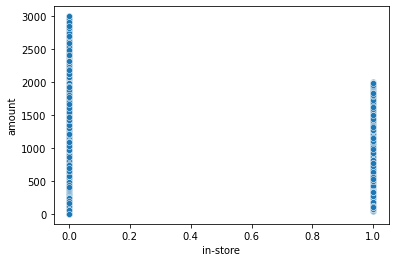

In [36]:
#In-Store and Amount, All Data
sns.scatterplot(data=data, x="in-store", y="amount")

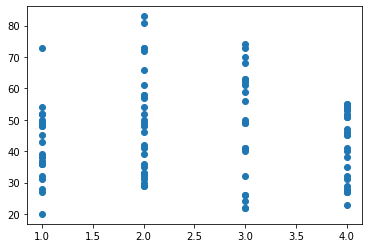

In [37]:
#Region and Age, Sample 100
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['age']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='region', ylabel='age'>

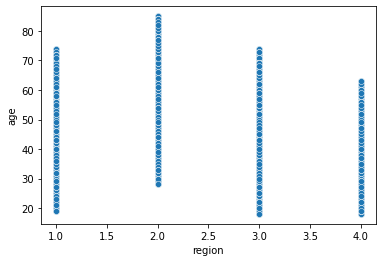

In [38]:
#Region and Age, All Data
sns.scatterplot(data=data, x="region", y="age")

<AxesSubplot:xlabel='region', ylabel='in-store'>

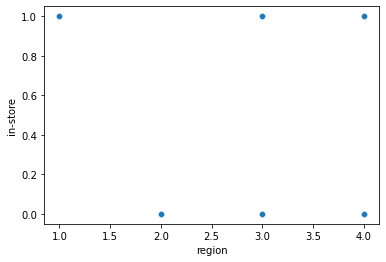

In [39]:
#Region and In-Store, All Data
sns.scatterplot(data=data, x="region", y="in-store")

<AxesSubplot:xlabel='in-store', ylabel='age'>

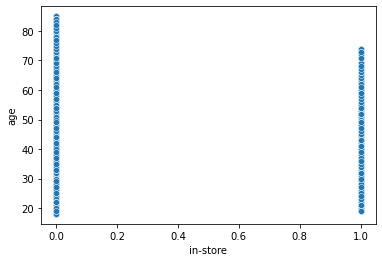

In [40]:
#In-Store and Age, All Data
sns.scatterplot(data=data, x="in-store", y="age")

<AxesSubplot:xlabel='age', ylabel='in-store'>

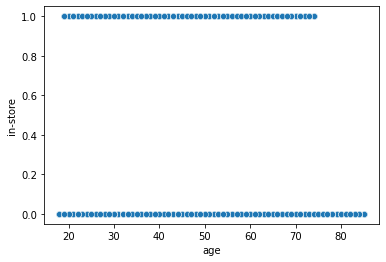

In [41]:
#In-Store and Age, All Data
sns.scatterplot(data=data, x="age", y="in-store")

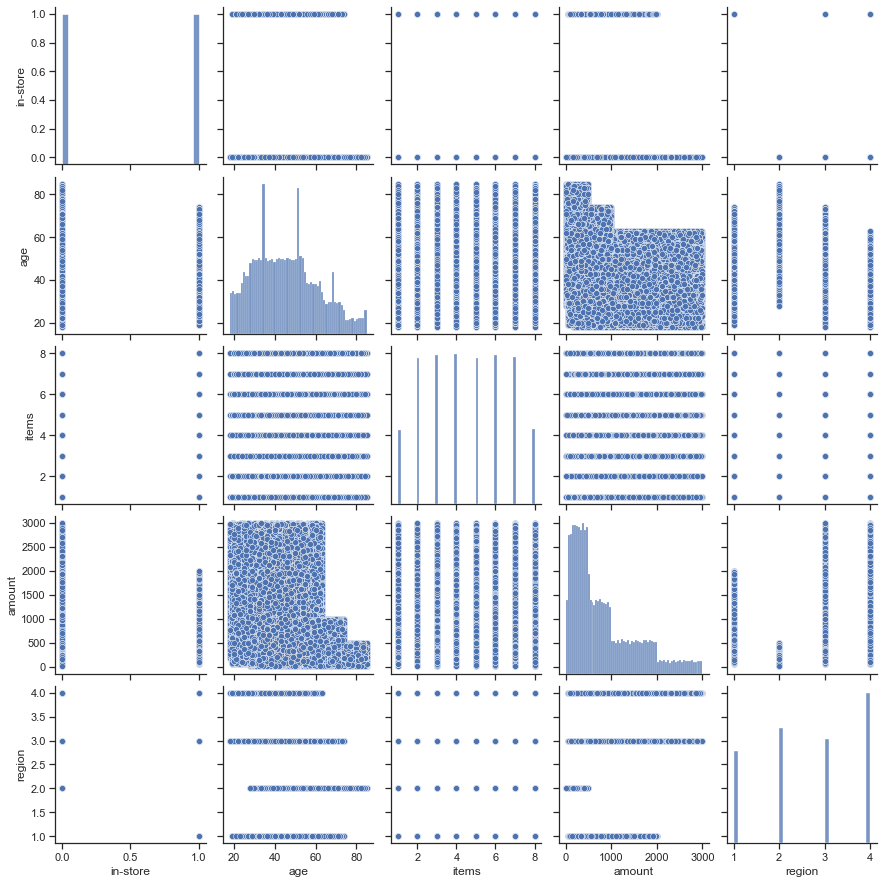

In [42]:
#PAIR PLOT
sns.set(style="ticks", color_codes=True)
pairplot1 = sns.pairplot(data)
pairplot1

#Box Plots

In [43]:
#Print Data headers
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


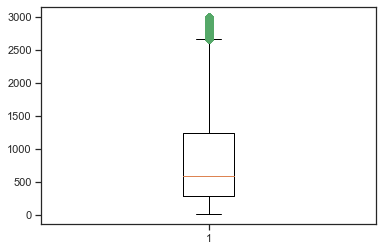

In [44]:
#Boxplot for Amount
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

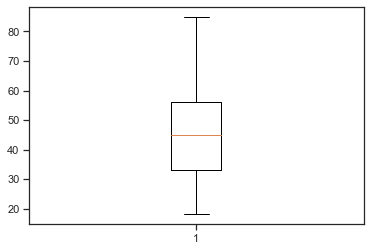

In [45]:
#Boxplot for Age
A = data['age']
plt.boxplot(A,0,'gD')
plt.show()

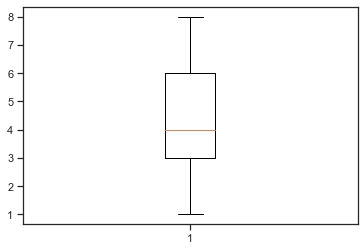

In [46]:
#Boxplot for Items
A = data['items']
plt.boxplot(A,0,'gD')
plt.show()

## Correlation

In [47]:
#Basic Correlation Coefficient Matrix - measure the strength of the relationship between each variable. 
#Correlation Coefficients range between -1 and 1, with numbers closer to -1 defining a strong negative correlation, 
#numbers closer to 1 defining a strong positive correlation and numbers closer to 0 meaning little to no correlation.

corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [48]:
#Observations: 
#Weak negative correlation between Age and In-Store 
#Weak negative correlation between Region and In-Store
#Weak negative correlation between Age and Amount
#Weak negative correlation between Age and Region
#Moderate positive Correlation between Region and Amount

## Covariance

In [49]:
#Basic Covariance Matrix - measure how changes in one variable are associated with changes in a second variable.
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


## Data Mining

In [50]:
# Total Transactions Per Region
transactioncount = data.groupby('region')['amount'].count()
print(transactioncount)

region
1    15997
2    19994
3    18000
4    25988
Name: amount, dtype: int64


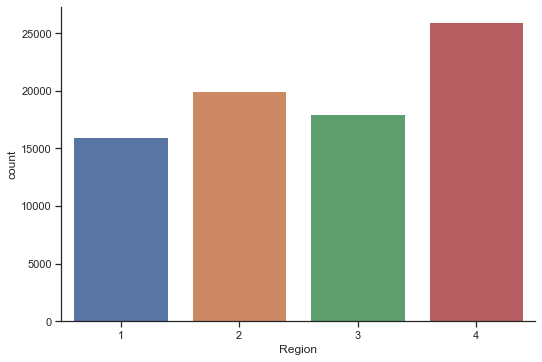

In [51]:
#Number of transaction by region
#count plots show the count of onservation in each categorical bin using bars
fg1 = sns.catplot(x='region', data=data,  kind='count', aspect=1.5)
fg1.set_xlabels('Region')

In [52]:
# Total Amount Spent by Region
totalsum = data.groupby('region')['amount'].sum()
roundedsum = totalsum.round(2)
print(roundedsum)

region
1    11917620.05
2     5040442.24
3    16523453.47
4    33366990.02
Name: amount, dtype: float64


In [53]:
#Average Per Transaction by Region
avgpertransaction = roundedsum/transactioncount
print(avgpertransaction)

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64


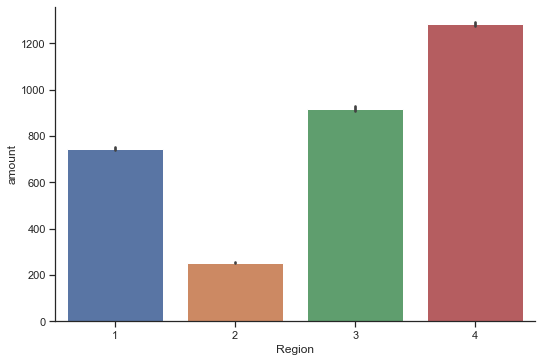

In [54]:
#Average spent per transaction by region
#bar shows the Mean or Average
fg2 = sns.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', aspect = 1.5)
fg2.set_xlabels('Region')

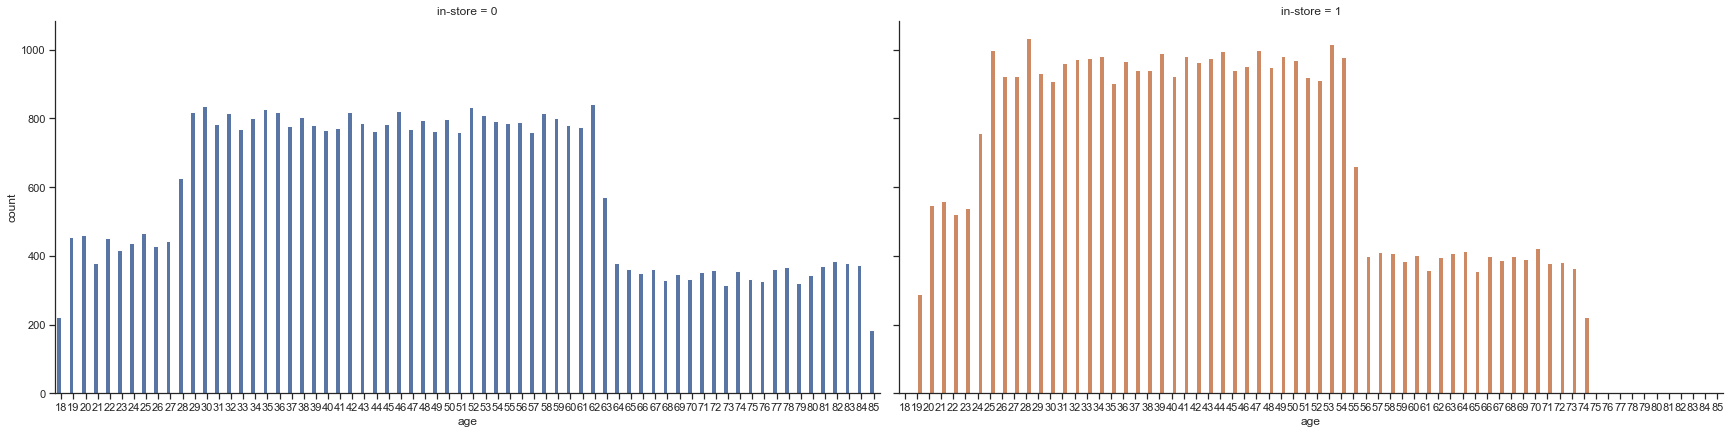

In [55]:
#Plot Age and In-Store
sns.catplot(x="age", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

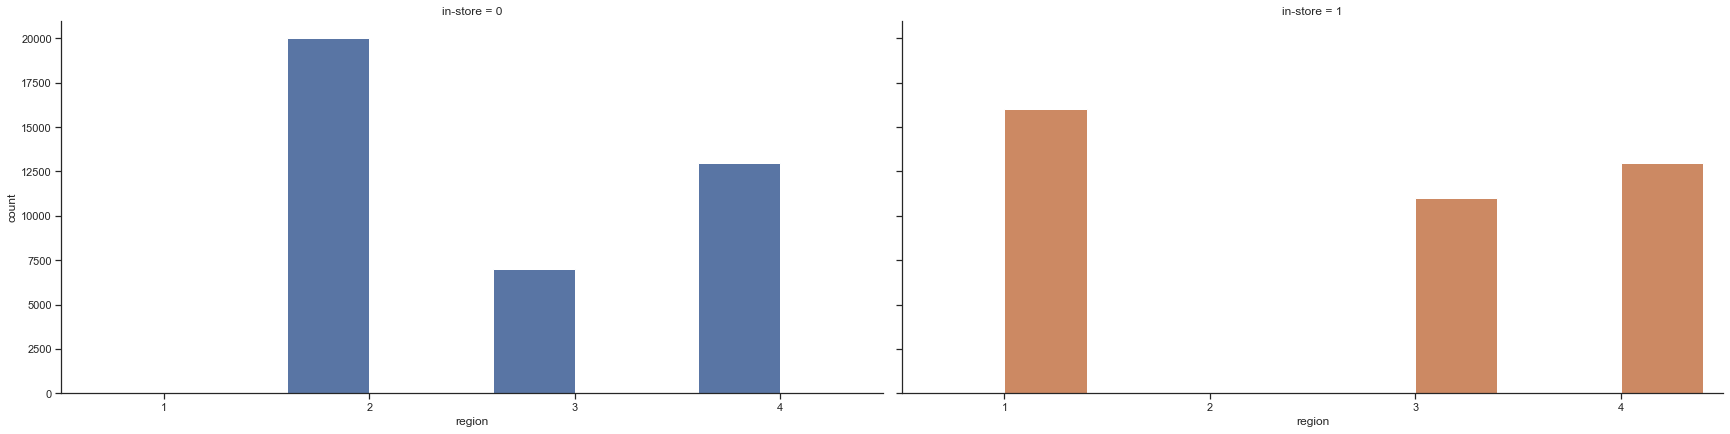

In [56]:
#Plot Region and In-Store
sns.catplot(x="region", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

# Task 2: Investigate Customer Demographics

In [57]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## Selecting Data

In [58]:
# Slicing using the [] operator selects a set of rows or columns from a Data Frame. 
#To slice out a set of rows, use the following syntax data[start:stop]
#The start is included in the output; the stop bound is one beyond the row you want to select

#Example: Select rows 0, 1, 2 (row 3 is not selected)
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [59]:
#Select any given column, use pandas to select a column by its name:
justregion = data['region']
print(justregion)

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 79979, dtype: int64


In [60]:
#If we need to select a range of columns (e.g., to establish the feature space) 
#we can include a sub-selection within the column portion of the array as follows:

justafewcolumns = data.iloc[:,0:4]
print(justafewcolumns)

       in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[79979 rows x 4 columns]


In [61]:
#Select the features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [62]:
#Select the dependent variable(what we want to study or predict)
y = data['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

# Training the Model

In [63]:
#1. Since you have already split your data into X and y components in the previous task, 
#lets now use the data and the train_test_split function of SciKit-Learn 
#to create the necessary training and testing data for our model as follows:

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [64]:
#2. Next, we'll instantiate (bring in a copy) the algorithm just as we did previously, 
#and we'll fit or apply the algorithm to our training sets to build the model as follows:

#Modeling (Classification)
dtc1 = DecisionTreeClassifier()
dtcFit1 = dtc1.fit(X_train,y_train)

In [65]:
#3. Now that you have a fully trained model, 
#you must use it on the testing set to make predictions before it can be assessed:

#Predictions
dtc1preds = dtcFit1.predict(X_test)

In [66]:
#4. Finally, you can print out the classification report using the predictions you just made 
#and the ground truth or the actual values from the testing set to assess 
#the model with a given metric as follows:

print(classification_report(y_test, dtc1preds))

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.38      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [67]:
#5. Optional:If you'd like to visualize the decision tree built using DecisionTreeClassifier(), 
#you can use the following method for doing so; this will help you answer the question(s) 
#you've been asked for this task:
from sklearn.tree import plot_tree

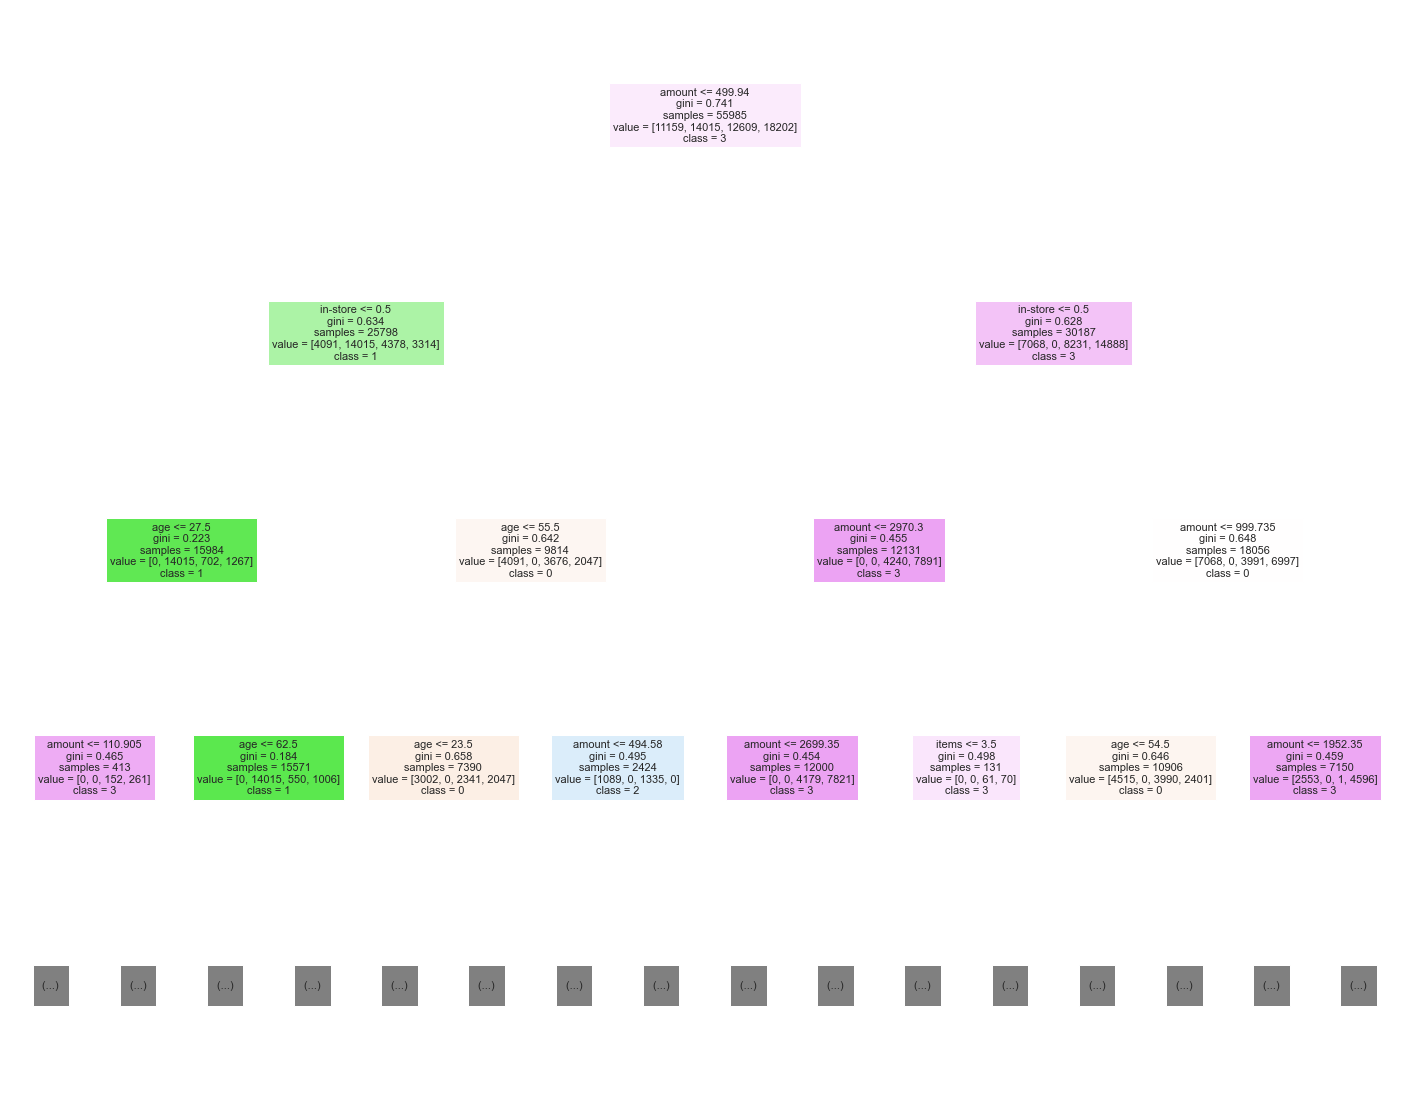

In [68]:
fig1 = plt.figure(figsize=(25,20))
tree1 = plot_tree(dtcFit1, max_depth=3, feature_names=X.columns,
                 class_names=['0', '1', '2', '3'], filled=True, fontsize=11)

In [69]:
dtc1.classes_

array([1, 2, 3, 4], dtype=int64)

In [70]:
region_num=['Region1','Region2','Region3','Region4']

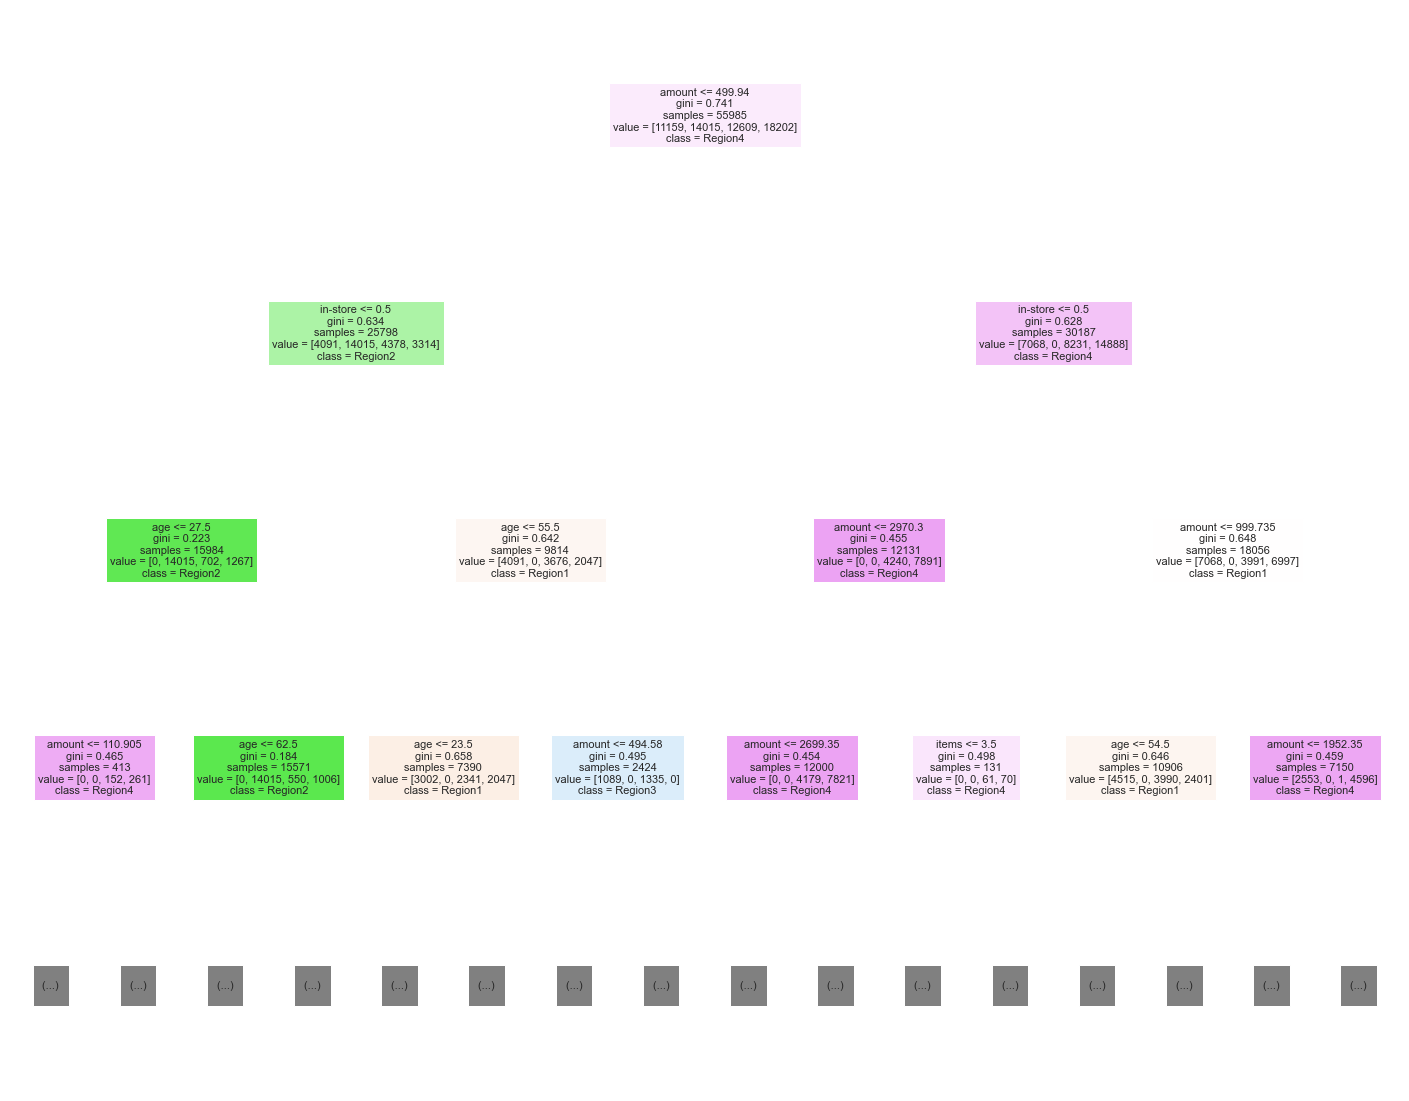

In [71]:
fig1a = plt.figure(figsize=(25,20))
tree1b = plot_tree(dtcFit1, max_depth=3, feature_names=X.columns,
                 class_names=region_num, filled=True, fontsize=11)

# Cross Validation

In [72]:
#Modeling Format:

#1. You are going to compare two classification algorithms. 
#Lets go ahead and prepare each algorithm for use. 
#You could ready each one individually, but that isn't very efficient, so lets handle both at once using an empty list.
#In order to do this, we must create a copy and store each instance we've already imported in a list. 
#We can easily create an empty list and append it with both algorithms as follows

algos_Class = []

algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Gradient Boosting Classifier', GradientBoostingClassifier())]


In [73]:
#2. To build and assess both models, we create an empty list to store the results and 
#another to hold the name of each algorithm so we can easily print out the results and 
#keep them separated as follows:

#classification
results = []
names = []
    
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [74]:
for i in range(len(names)):
        print(names[i],results[i].mean())

Random Forest Classifier 0.5841157976016379
Decision Tree Classifier 0.5623225942274608
Gradient Boosting Classifier 0.643281380474906


# Discretize Age and Amount

In [75]:
data['amount_cut']= pd.cut(data.amount,bins=[0,500,1000,1500,2000,2500,3000],
                           labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000'])
data.head()

,in-store,age,items,amount,region,amount_cut
0,0,37,4,281.03,2,0-500
1,0,35,2,219.51,2,0-500
2,1,45,3,1525.70,4,1500-2000
3,1,46,3,715.25,3,500-1000
4,1,33,4,1937.50,1,1500-2000


In [76]:
data['age_cut'] = pd.cut(data.age,bins=[0,10,20,29,39,49,59,69,79,89], 
                          right=False, labels=[0,10,20,30,40,50,60,70,80])
data.head()

,in-store,age,items,amount,region,amount_cut,age_cut
0,0,37,4,281.03,2,0-500,30
1,0,35,2,219.51,2,0-500,30
2,1,45,3,1525.70,4,1500-2000,40
3,1,46,3,715.25,3,500-1000,40
4,1,33,4,1937.50,1,1500-2000,30


In [77]:
data['Transaction Type'] = pd.cut(data['in-store'],bins=[0,1,2], right=False, labels=['Online',"In-store"])
data.head()

,in-store,age,items,amount,region,amount_cut,age_cut,Transaction Type
0,0,37,4,281.03,2,0-500,30,Online
1,0,35,2,219.51,2,0-500,30,Online
2,1,45,3,1525.70,4,1500-2000,40,In-store
3,1,46,3,715.25,3,500-1000,40,In-store
4,1,33,4,1937.50,1,1500-2000,30,In-store


In [78]:
data['amount_cut2']= pd.cut(data.amount,bins=[0,500,1000,1500,2000,2500,3000],
                           labels=[0,500,1000,1500,2000,2500])
data.head()

,in-store,age,items,amount,region,amount_cut,age_cut,Transaction Type,amount_cut2
0,0,37,4,281.03,2,0-500,30,Online,0
1,0,35,2,219.51,2,0-500,30,Online,0
2,1,45,3,1525.70,4,1500-2000,40,In-store,1500
3,1,46,3,715.25,3,500-1000,40,In-store,500
4,1,33,4,1937.50,1,1500-2000,30,In-store,1500


# Change Dependent Variable to Age_Cut (after discretizing age)

In [79]:
#Select the features
X = data.iloc[:,[0,2,3,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [80]:
#Select the dependent variable(what we want to study or predict)
y = data['age_cut']
y.head()

0    30
1    30
2    40
3    40
4    30
Name: age_cut, dtype: category
Categories (9, int64): [0 < 10 < 20 < 30 ... 50 < 60 < 70 < 80]

In [81]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [82]:
#Modeling (Classification)
dtc2 = DecisionTreeClassifier()
dtcFit2 = dtc2.fit(X_train,y_train)

In [83]:
#Predictions
dtc2preds = dtcFit2.predict(X_test)

In [84]:
print(classification_report(y_test, dtc2preds))

              precision    recall  f1-score   support

          10       0.04      0.03      0.03       301
          20       0.18      0.18      0.18      3274
          30       0.22      0.23      0.23      5179
          40       0.23      0.23      0.23      5363
          50       0.20      0.21      0.20      4601
          60       0.15      0.15      0.15      2849
          70       0.14      0.13      0.13      1708
          80       0.14      0.15      0.15       719

    accuracy                           0.20     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.20      0.20      0.20     23994



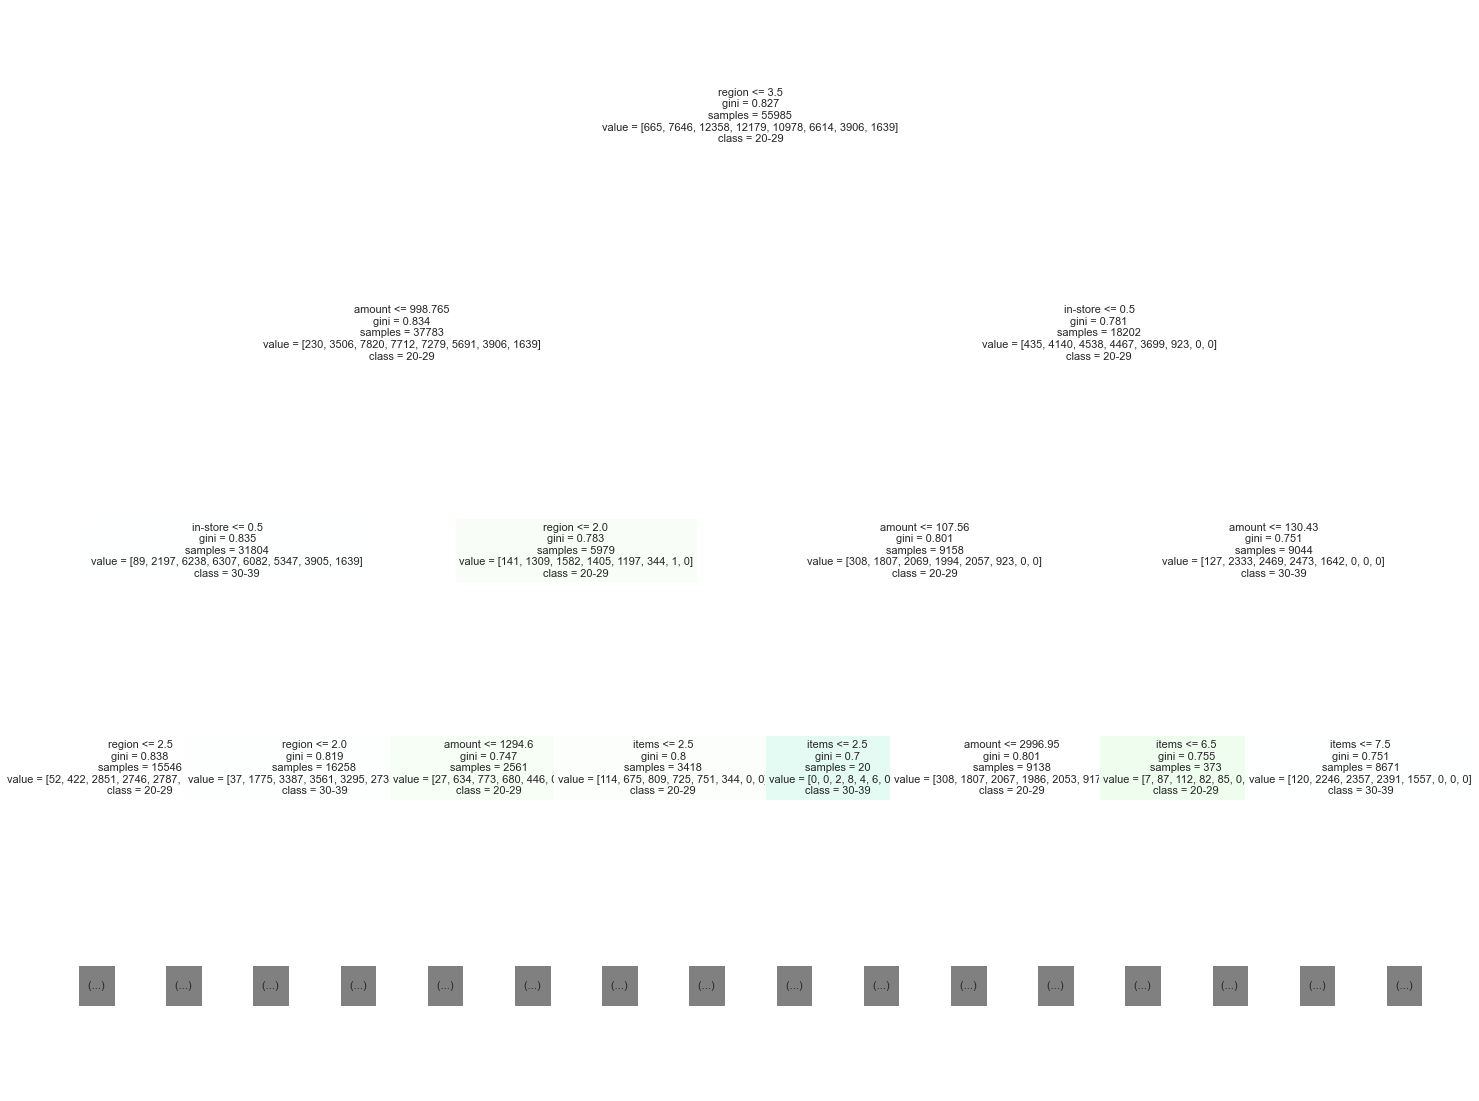

In [85]:
fig2 = plt.figure(figsize=(25,20))
tree2 = plot_tree(dtcFit2, max_depth=3, feature_names=X.columns, 
                   class_names=['0-10','10-19','20-29','30-39','40-49','50-59','60-69','70-89','80-89'], filled=True,fontsize=11)

# Change Dependent Variable to Amount_Cut (after discretizing Amount)

In [86]:
#Select the features
X = data.iloc[:,[0,1,2,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [87]:
#Select the dependent variable(what we want to study or predict)
y = data['amount_cut2']
y.head()

0       0
1       0
2    1500
3     500
4    1500
Name: amount_cut2, dtype: category
Categories (6, int64): [0 < 500 < 1000 < 1500 < 2000 < 2500]

In [88]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [89]:
#Modeling (Classification)
dtc3 = DecisionTreeClassifier()
dtcFit3 = dtc3.fit(X_train,y_train)

In [90]:
#Predictions
dtc3preds = dtcFit3.predict(X_test)

In [91]:
print(classification_report(y_test, dtc3preds))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     11014
         500       0.38      0.45      0.41      5819
        1000       0.22      0.21      0.21      2560
        1500       0.22      0.16      0.19      2592
        2000       0.14      0.09      0.11      1002
        2500       0.15      0.11      0.13      1007

    accuracy                           0.48     23994
   macro avg       0.30      0.29      0.29     23994
weighted avg       0.47      0.48      0.47     23994



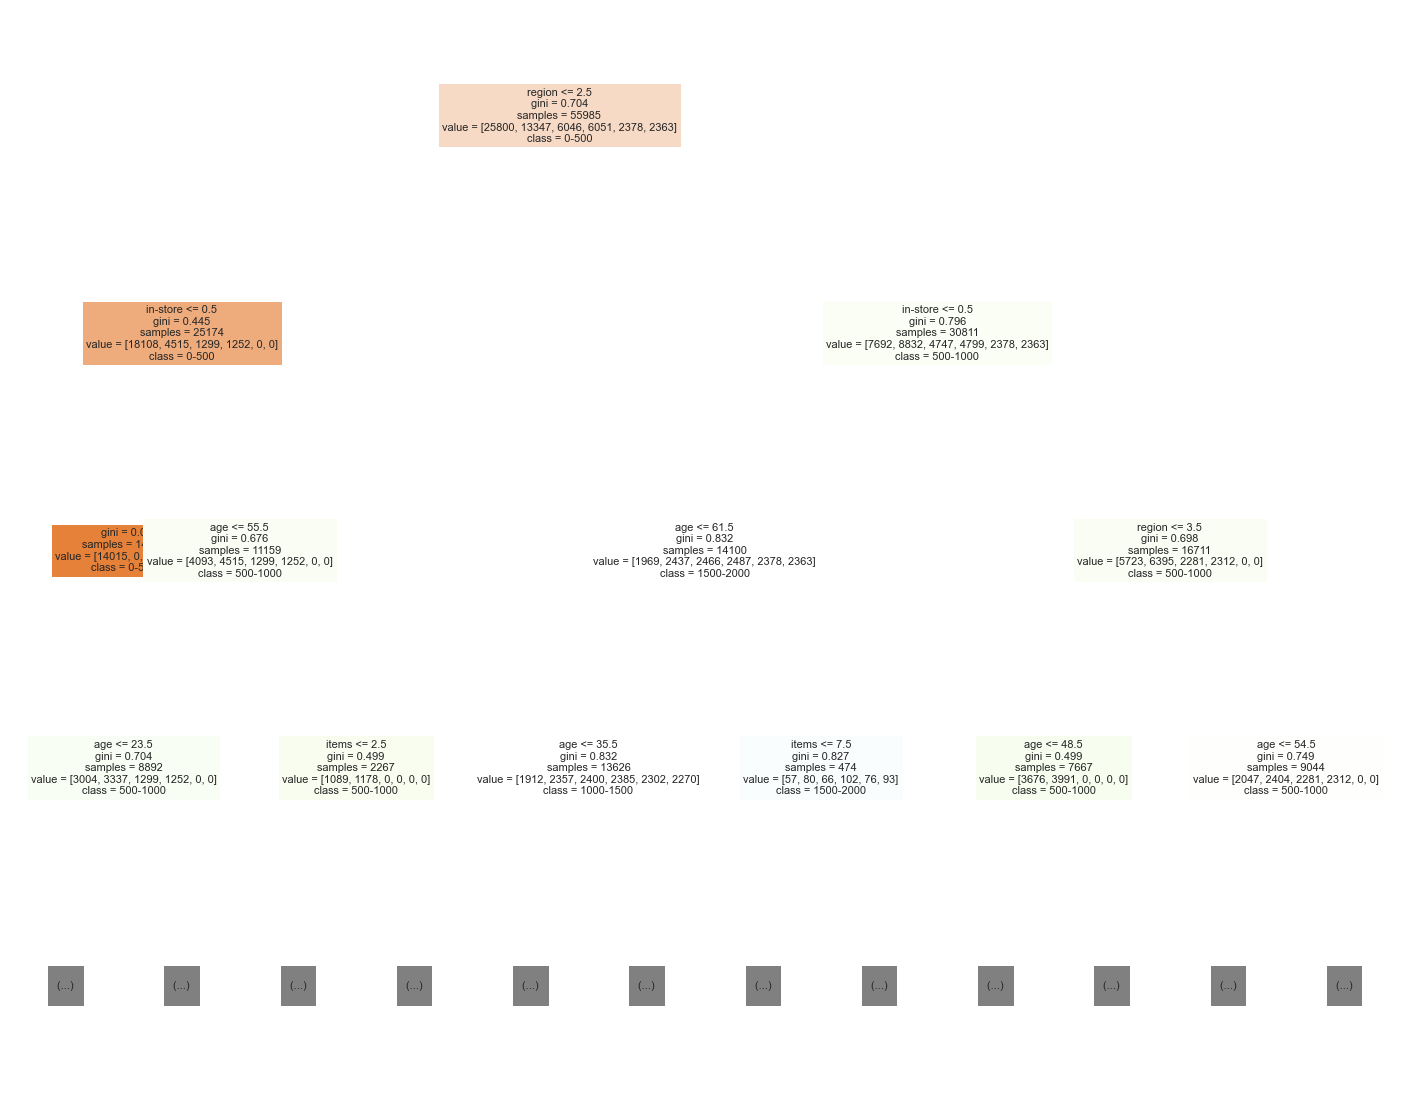

In [92]:
fig3 = plt.figure(figsize=(25,20))
tree3 = plot_tree(dtcFit3, max_depth=3, feature_names=X.columns, class_names=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000'], filled=True,fontsize=11)

In [93]:
dtc3.classes_

array([   0,  500, 1000, 1500, 2000, 2500], dtype=int64)

# Change Dependent Variable to Location (Transaction Type)

In [94]:
#Select the features
X = data.iloc[:,[1,2,3,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [95]:
#Select the dependent variable(what we want to study or predict)
y = data['in-store']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64

In [96]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [97]:
#Modeling (Classification)
dtc4 = DecisionTreeClassifier()
dtcFit4 = dtc4.fit(X_train,y_train)

In [98]:
#Predictions
dtc4preds = dtcFit4.predict(X_test)

In [99]:
print(classification_report(y_test, dtc4preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     11874
           1       0.85      0.84      0.85     12120

    accuracy                           0.85     23994
   macro avg       0.85      0.85      0.85     23994
weighted avg       0.85      0.85      0.85     23994



In [100]:
dtc4.classes_

array([0, 1], dtype=int64)

In [101]:
location_num=['online','in-store']

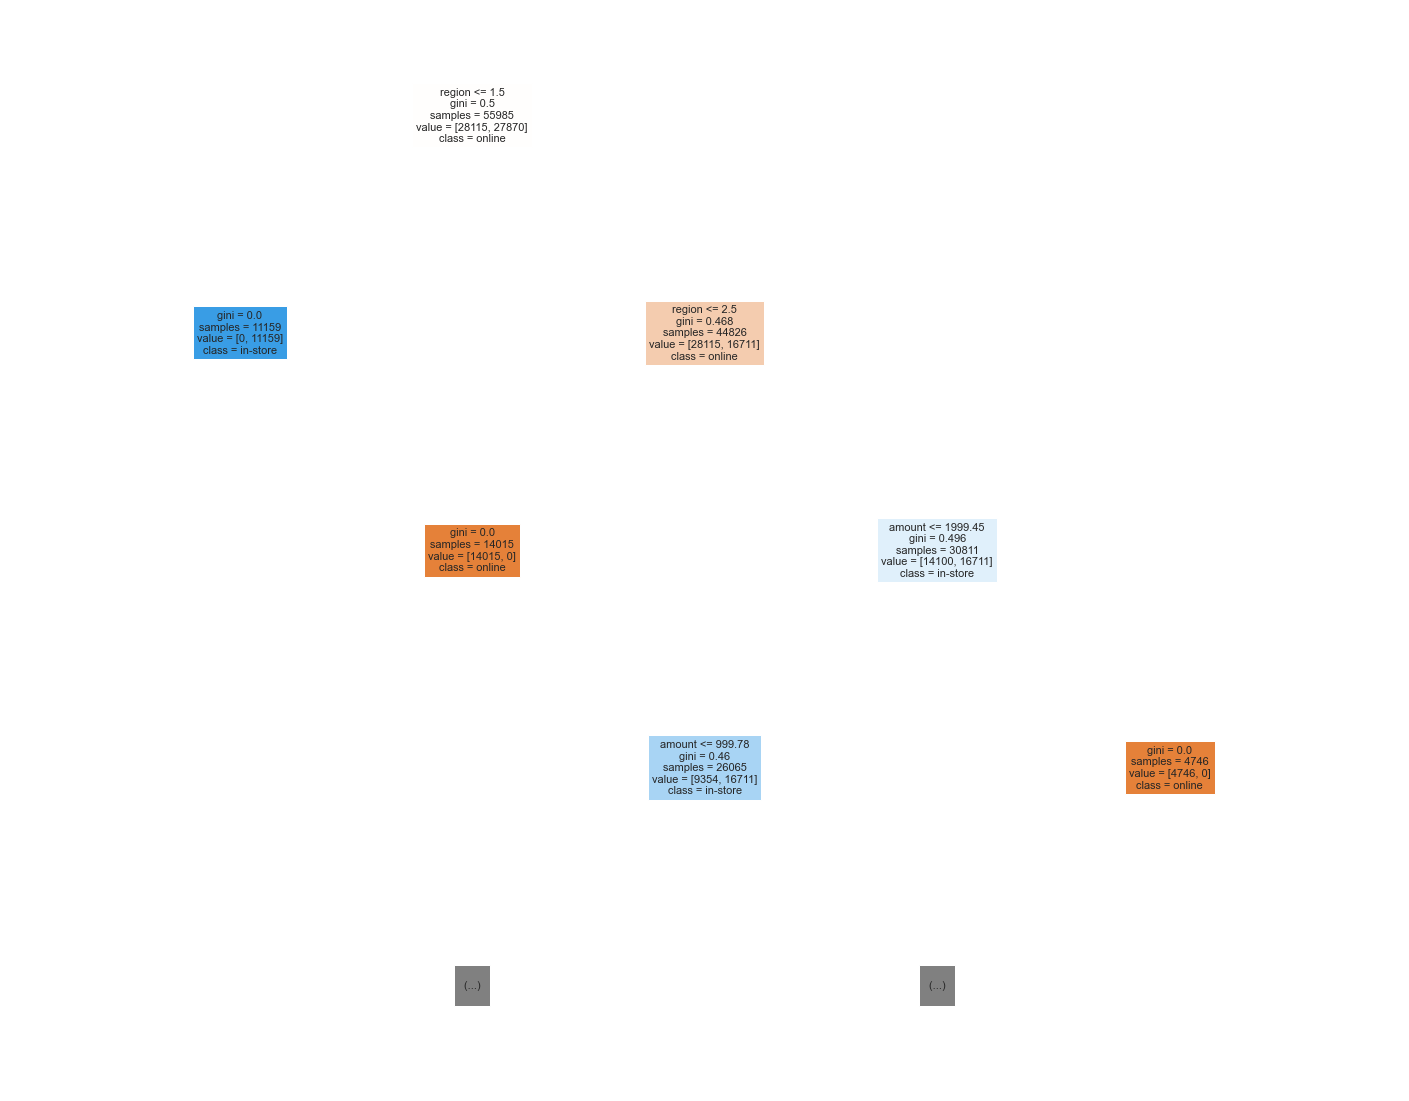

In [102]:
fig4 = plt.figure(figsize=(25,20))
tree4 = plot_tree(dtcFit4, max_depth=3, feature_names=X.columns,
                 class_names=location_num, filled=True, fontsize=11)

# Visualizations

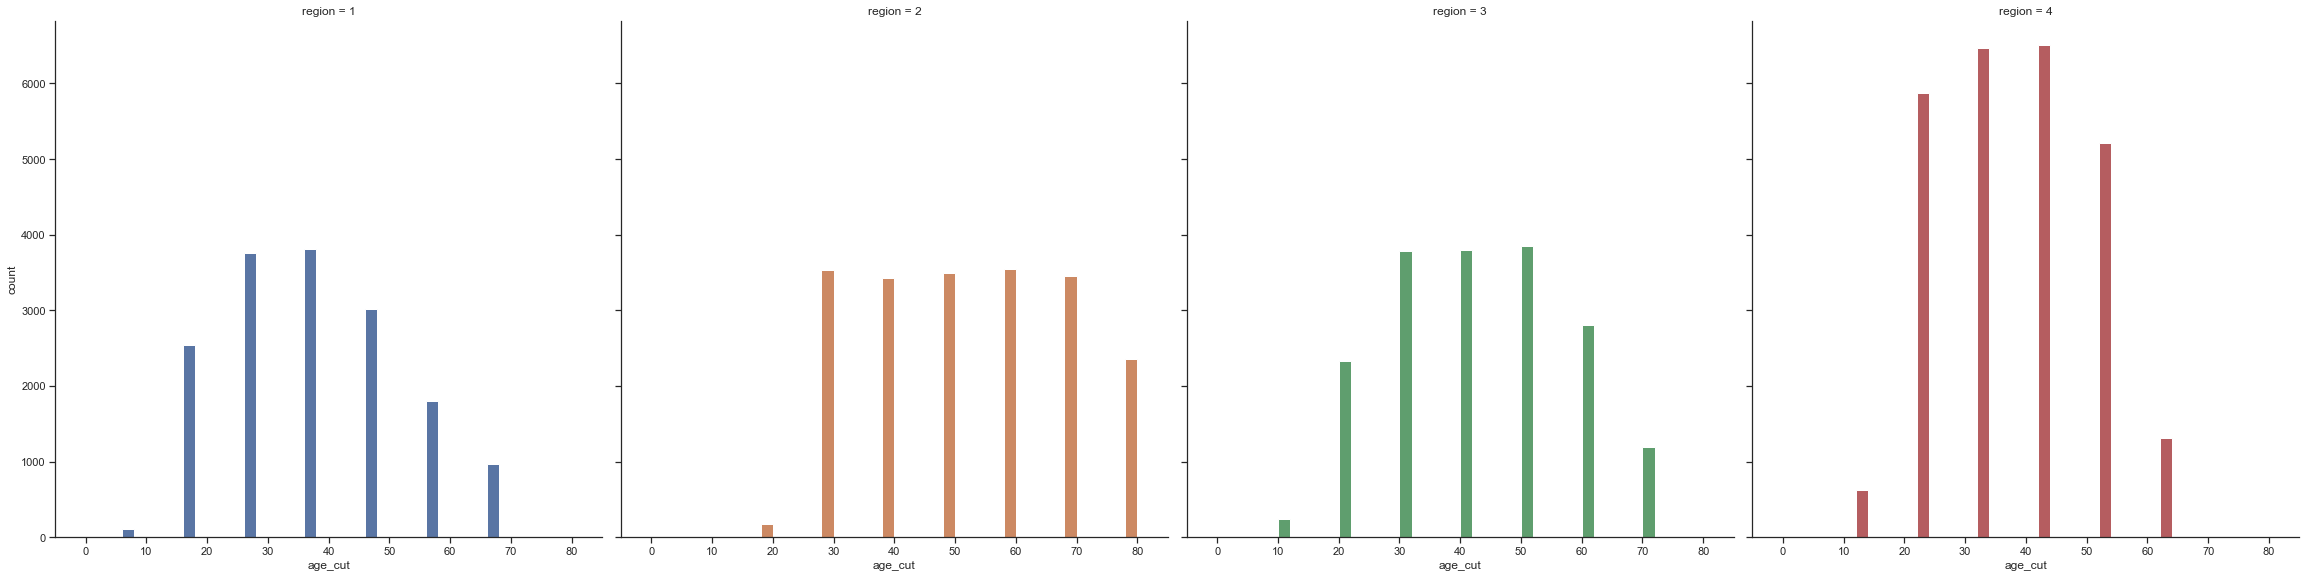

In [103]:
#Age and Region
sns.catplot(x="age_cut", hue="region", col="region",

                data=data, kind="count",

                height=8, aspect=1);

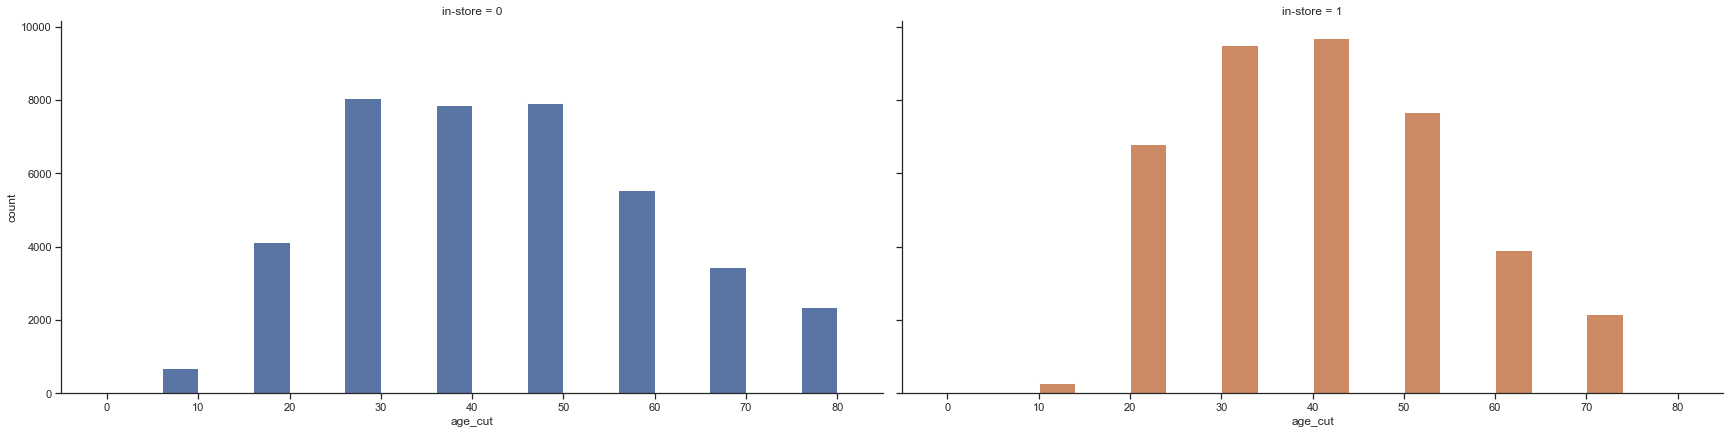

In [104]:
#Age and In-store
sns.catplot(x="age_cut", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

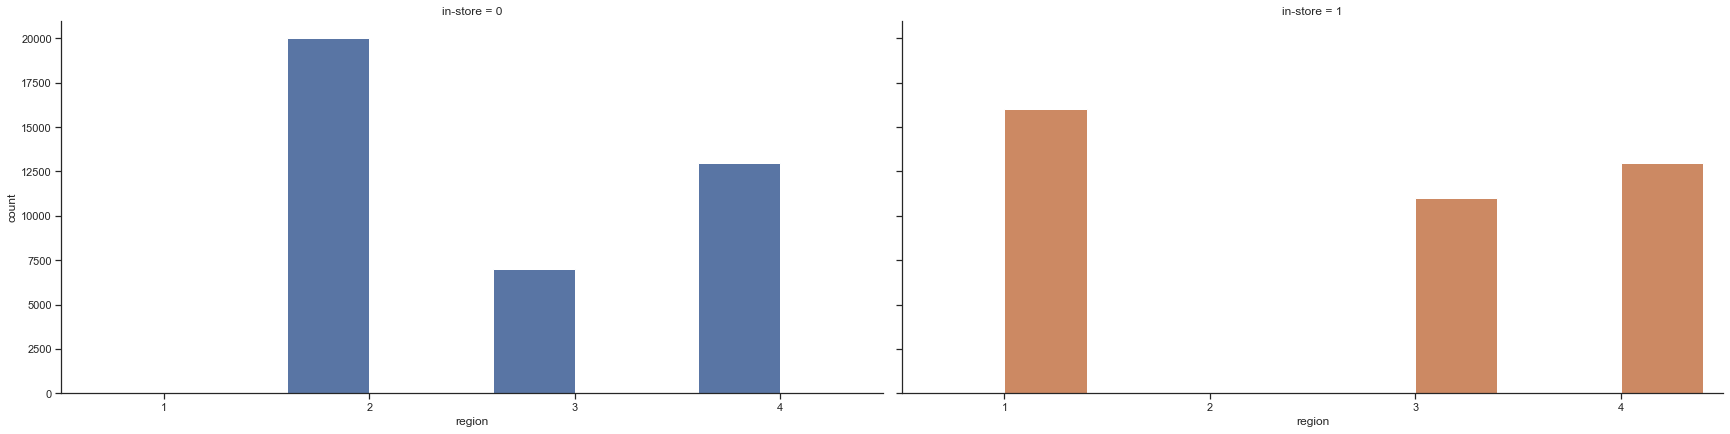

In [105]:
#Region and In-store
sns.catplot(x="region", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

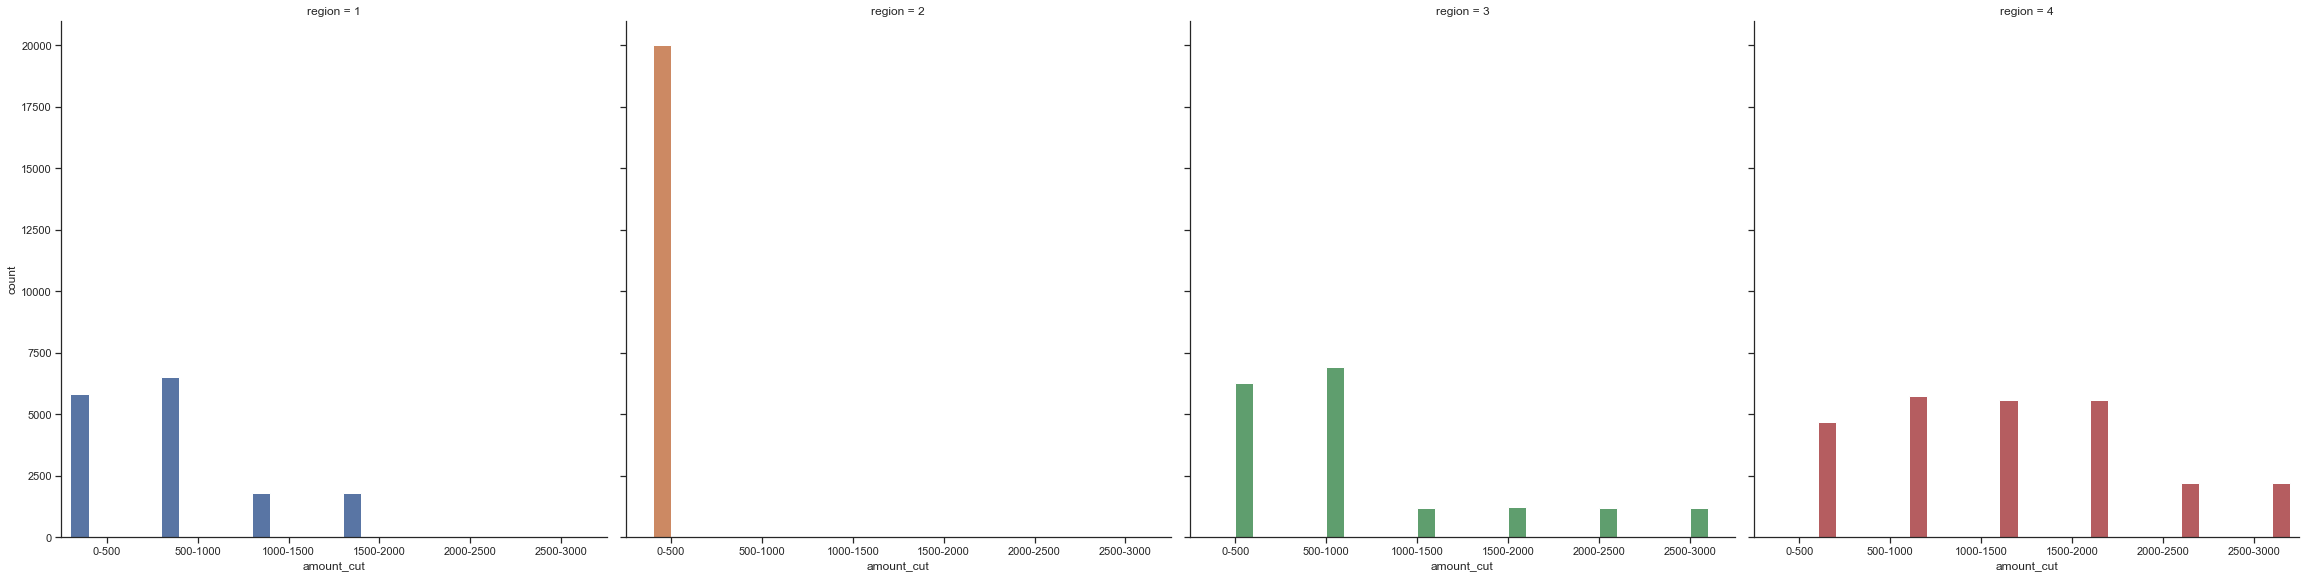

In [106]:
#Amount and Region
sns.catplot(x="amount_cut", hue="region", col="region",

                data=data, kind="count",

                height=8, aspect=1);

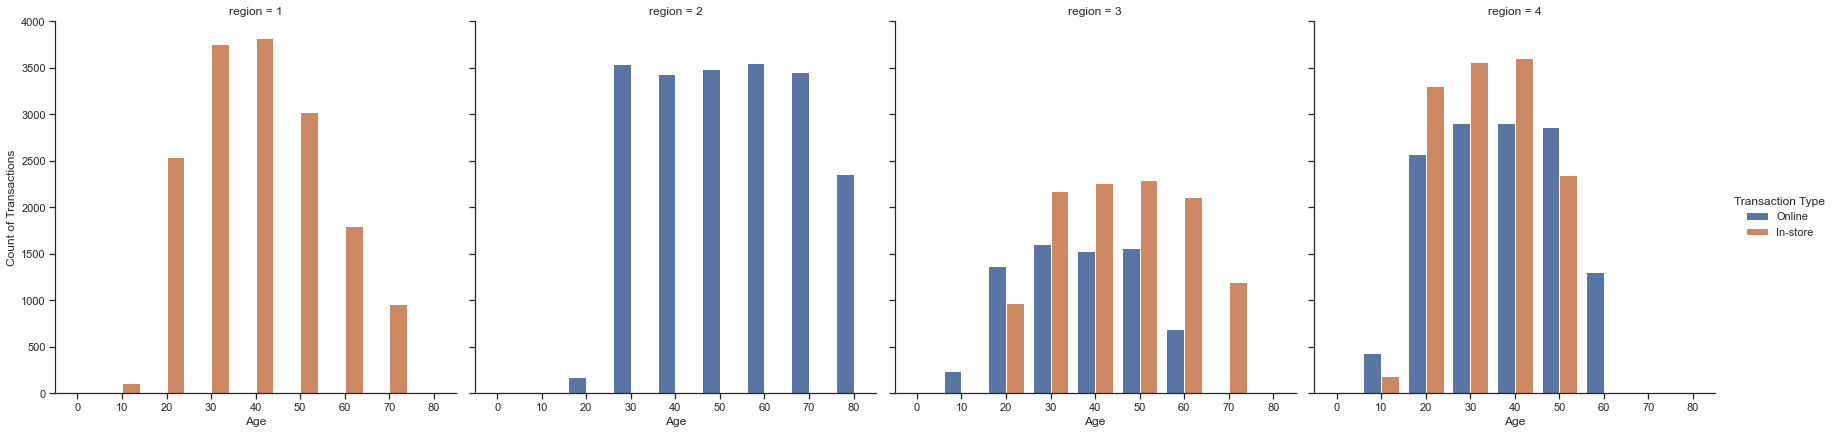

In [107]:
#Age, Region, and Transaction Type
FigA = sns.catplot(x="age_cut", hue="Transaction Type", col="region",

                data=data, kind="count",

                height=6, aspect=1);

FigA.set_axis_labels("Age", "Count of Transactions")

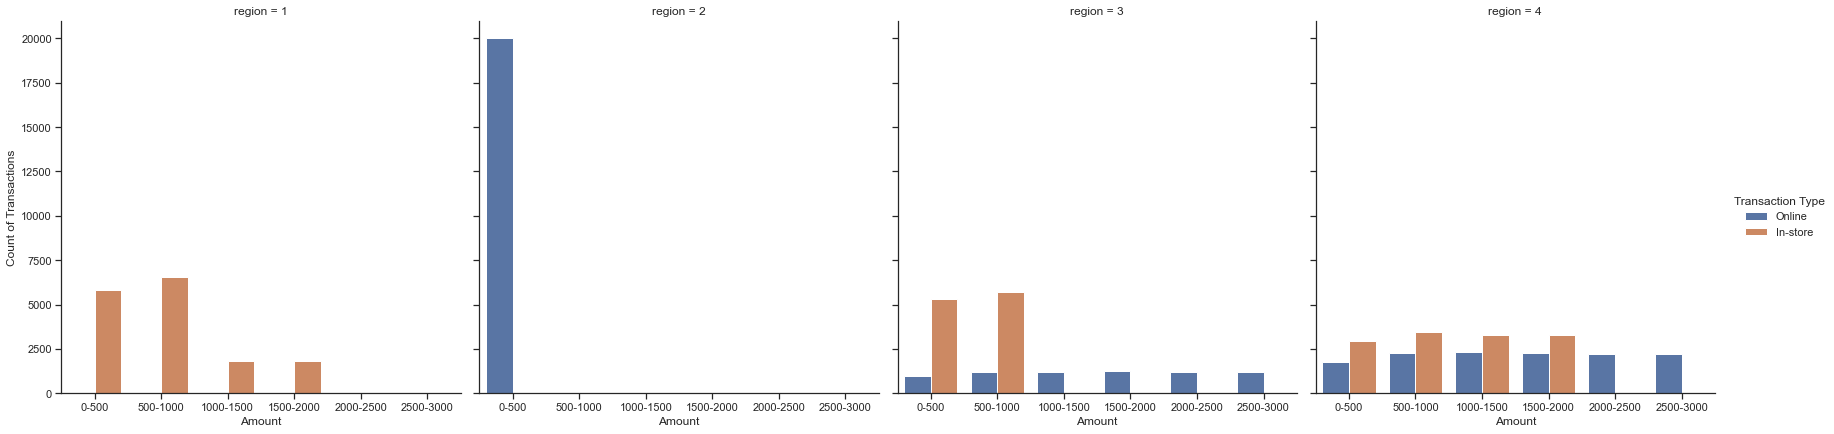

In [108]:
#Amount, Region and Transaction Type
FigB = sns.catplot(x="amount_cut2", hue="Transaction Type", col="region",

                data=data,kind="count",

                height=6, aspect=1);

FigB.set_axis_labels("Amount", "Count of Transactions") 
FigB.set_xticklabels(["0-500","500-1000","1000-1500","1500-2000","2000-2500","2500-3000"])


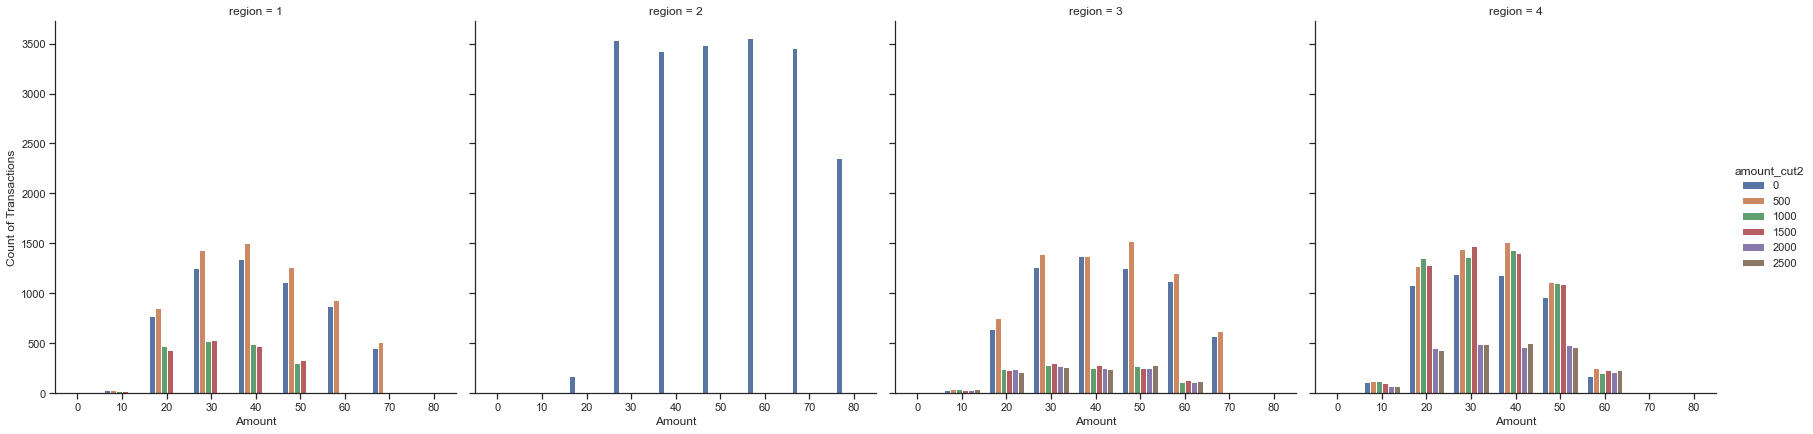

In [109]:
#Amount, Region and Transaction Type
FigC = sns.catplot(x="age_cut", hue="amount_cut2", col="region",

                data=data,kind="count",

                height=6, aspect=1);

FigC.set_axis_labels("Amount", "Count of Transactions") 

<AxesSubplot:title={'center':'Age and Region'}, xlabel='Age by Decade', ylabel='Count of Transactions'>

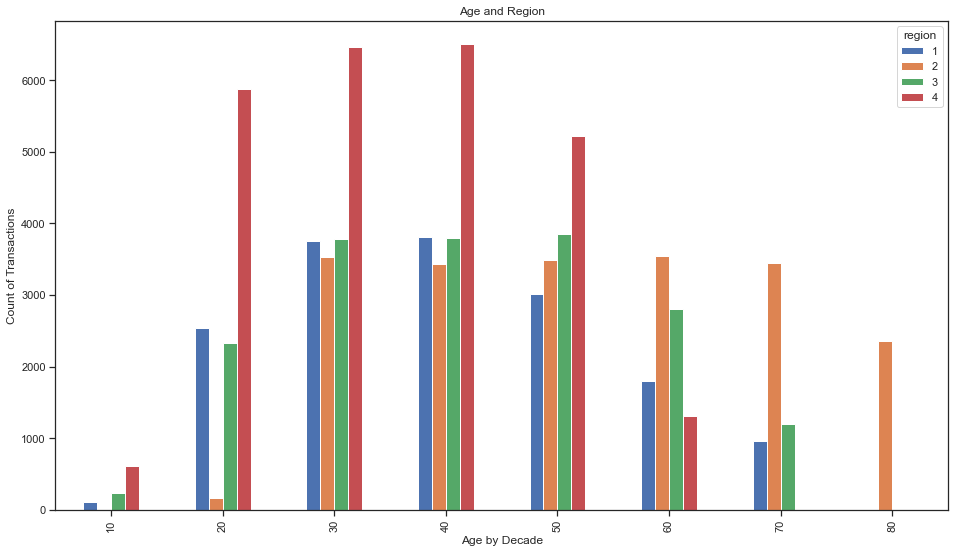

In [110]:
#Pivot Age and Region
pivot_age_region = pd.pivot_table(data,index ='age_cut',columns='region',values='items',aggfunc='count',fill_value=0)
pivot_age_region.plot.bar(figsize=(16,9), title='Age and Region', xlabel='Age by Decade',ylabel='Count of Transactions')

<AxesSubplot:title={'center':'Age and Transaction Type'}, xlabel='Age by Decade', ylabel='Count of Transactions'>

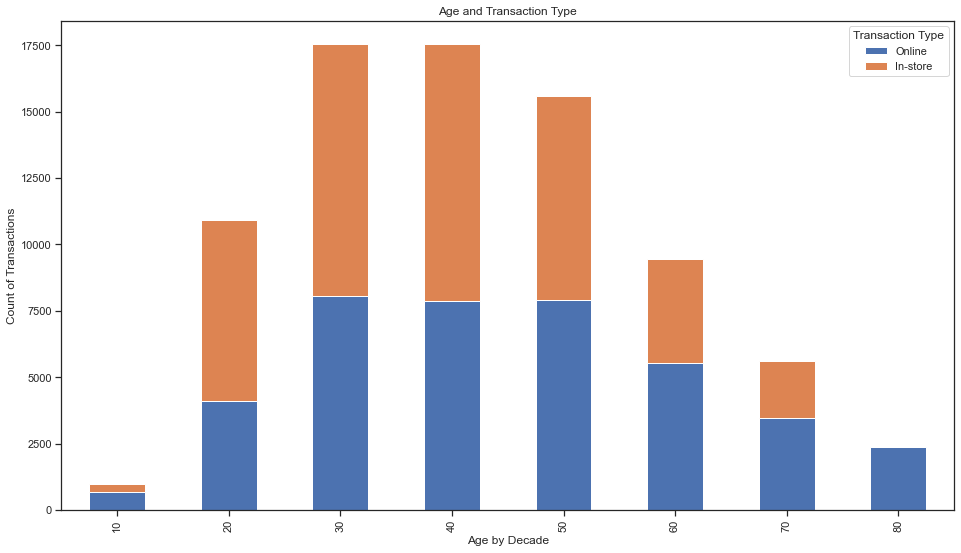

In [111]:
#Pivot Age and Transaction Type
pivot_age_type = pd.pivot_table(data,index ='age_cut',columns='Transaction Type',values='items',aggfunc='count',fill_value=0)
pivot_age_type.plot.bar(figsize=(16,9), title='Age and Transaction Type', xlabel='Age by Decade', ylabel='Count of Transactions', stacked=True)

<AxesSubplot:title={'center':'Region and Transaction Type'}, xlabel='Region', ylabel='Count of Transactions'>

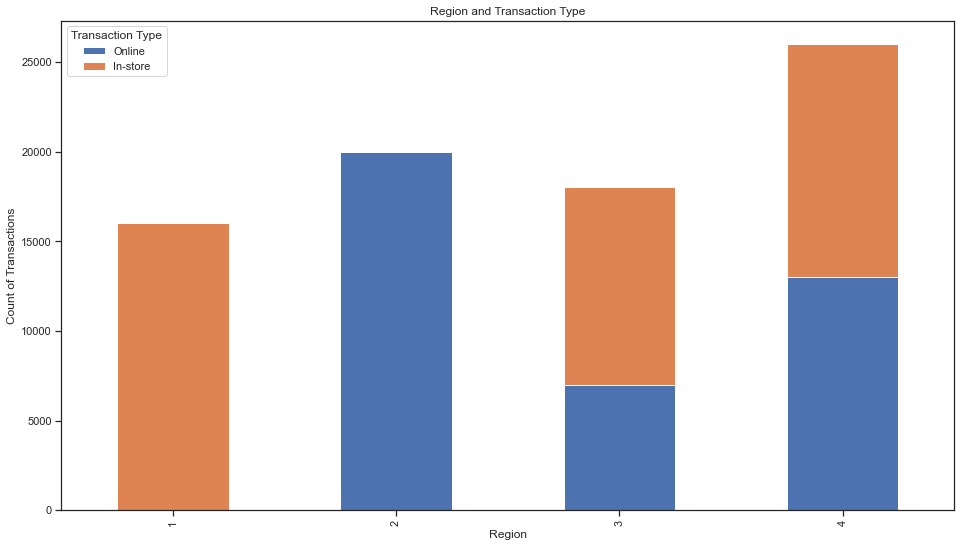

In [112]:
#Pivot Region and Transaction Type
pivot_region_transactiontype = pd.pivot_table(data,index ='region',columns='Transaction Type',values='items',aggfunc='count',fill_value=0)
pivot_region_transactiontype.plot.bar(figsize=(16,9), title='Region and Transaction Type', xlabel='Region', ylabel='Count of Transactions', stacked=True)

<AxesSubplot:title={'center':'Amount and Transaction Type'}, xlabel='Amount', ylabel='Count of Transactions'>

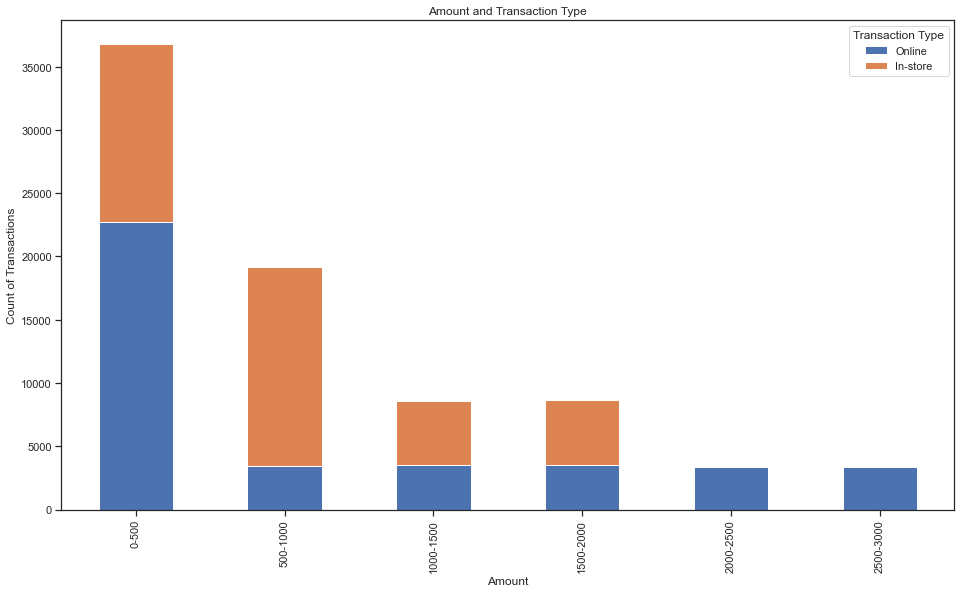

In [113]:
#Pivot Amount and Transaction Type
pivot_amount_type = pd.pivot_table(data,index ='amount_cut',columns='Transaction Type',values='items',aggfunc='count',fill_value=0)
pivot_amount_type.plot.bar(figsize=(16,9), title='Amount and Transaction Type', xlabel='Amount', ylabel='Count of Transactions', stacked=True)

Try Different Age Bins

In [114]:
data['age_youngold'] = pd.cut(data.age,bins=[0,36,85], 
                          right=False, labels=['Younger','Older'])
data.head(20)

,in-store,age,items,amount,region,amount_cut,age_cut,Transaction Type,amount_cut2,age_youngold
0,0,37,4,281.0300,2,0-500,30,Online,0,Older
1,0,35,2,219.5100,2,0-500,30,Online,0,Younger
2,1,45,3,1525.7000,4,1500-2000,40,In-store,1500,Older
3,1,46,3,715.2500,3,500-1000,40,In-store,500,Older
4,1,33,4,1937.5000,1,1500-2000,30,In-store,1500,Younger
5,0,24,3,1314.2000,4,1000-1500,20,Online,1000,Younger
6,0,43,6,8.5472,2,0-500,40,Online,0,Older
7,1,66,5,819.9800,3,500-1000,60,In-store,500,Older
8,1,51,5,908.3100,1,500-1000,50,In-store,500,Older
9,1,47,3,767.5400,1,500-1000,40,In-store,500,Older


<AxesSubplot:title={'center':'Age and Transaction Type'}, xlabel='Age Group', ylabel='Count of Transactions'>

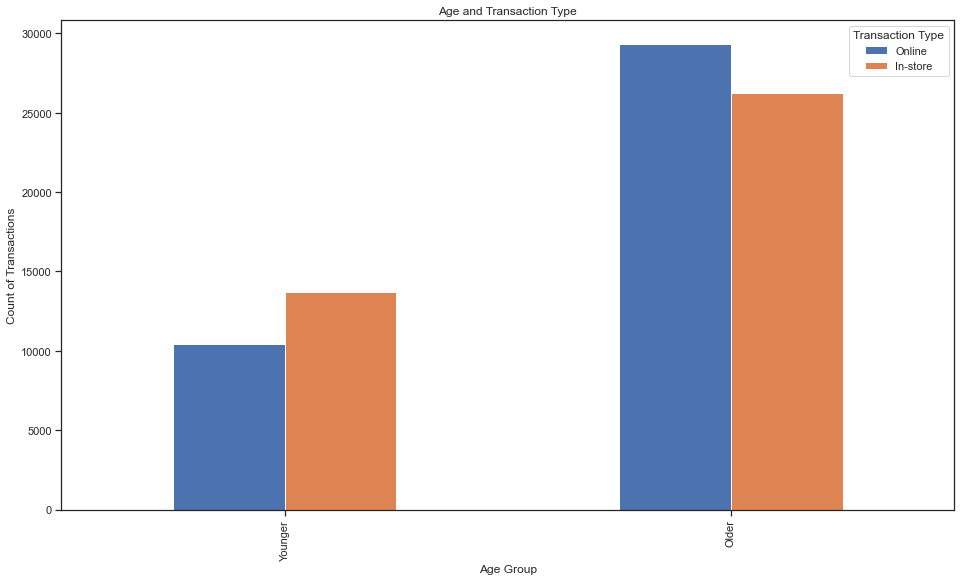

In [121]:
#Pivot Age and Transaction Type
pivot_age_type = pd.pivot_table(data,index ='age_youngold',columns='Transaction Type',values='items',aggfunc='count',fill_value=0)
pivot_age_type.plot.bar(figsize=(16,9), title='Age and Transaction Type', xlabel='Age Group', ylabel='Count of Transactions')

<AxesSubplot:title={'center':'Age Group and Transaction Amount'}, xlabel='Transaction Amount', ylabel='Count of Transactions'>

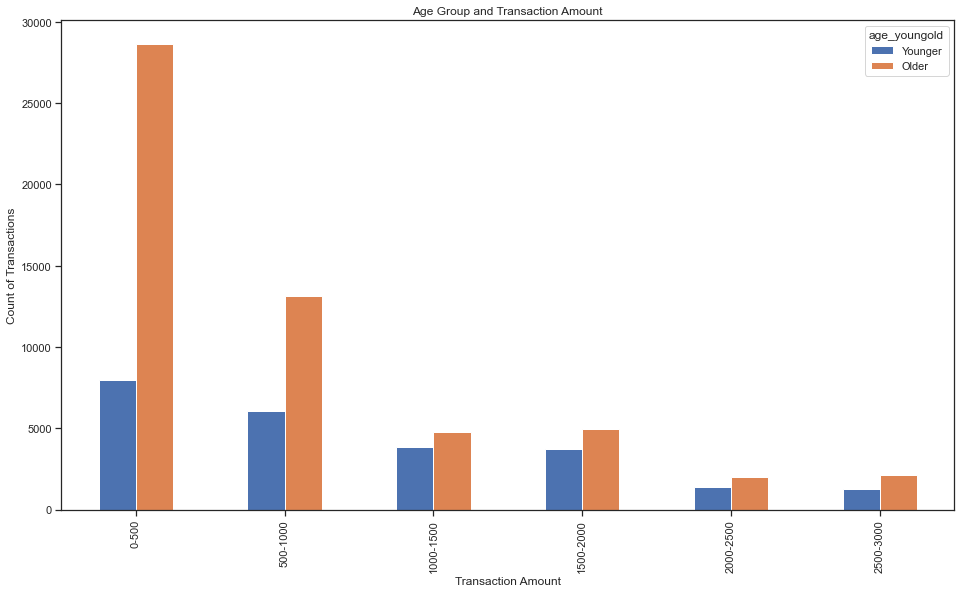

In [123]:
#Pivot Age and Transaction Type
pivot_age_type = pd.pivot_table(data,index ='amount_cut',columns='age_youngold',values='items',aggfunc='count',fill_value=0)
pivot_age_type.plot.bar(figsize=(16,9), title='Age Group and Transaction Amount', xlabel='Transaction Amount', ylabel='Count of Transactions')